<a href="https://colab.research.google.com/github/thepankj/ml-algo-from-scratch/blob/main/AdaBoost/AdaBoost_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
df  =pd.DataFrame()

In [ ]:
df['X1'] = [1,2,3,4,5,6,6,7,8,9]
df['X2'] = [5,5,6,8,4,9,7,5,8,2]
df['y'] = [1,0,1,1,0,1,0,0,1,0]

In [ ]:
#the dataset
df 

,X1,X2,y
0,1,5,1
1,2,5,0
2,3,6,1
3,4,8,1
4,5,4,0
5,6,9,1
6,6,7,0
7,7,5,0
8,8,8,1
9,9,2,0


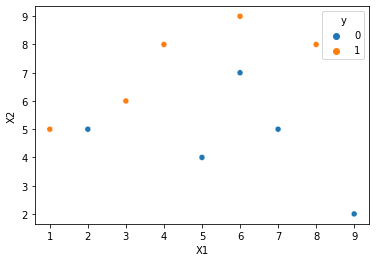

In [ ]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['y'])

In [ ]:
#Step 1: initial weight
df['weight'] = 1/df.shape[0]

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [ ]:
X = df.iloc[:, :2].values
y = df.iloc[:, 2].values

In [ ]:
#Step 2: Train initial model
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 7.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

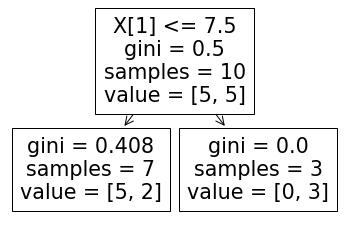

In [ ]:
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


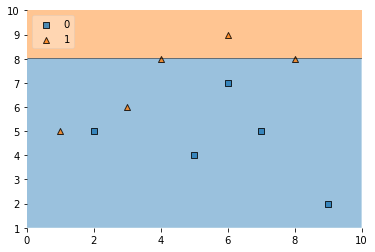

In [ ]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [ ]:
df['pred1'] = dt1.predict(X)

In [ ]:
df

,X1,X2,y,weight,pred1
0,1,5,1,0.1,0
1,2,5,0,0.1,0
2,3,6,1,0.1,0
3,4,8,1,0.1,1
4,5,4,0,0.1,0
5,6,9,1,0.1,1
6,6,7,0,0.1,0
7,7,5,0,0.1,0
8,8,8,1,0.1,1
9,9,2,0,0.1,0


In [ ]:
#Step 3
#function to count the misclassified values and the error rate
def error_rate(y_actual, y_pred, weight_row):
  l = len(y_actual)
  er = 0
  for i in range(l):
    if y_actual[i] != y_pred[i]:
      er += weight_row[i]
  return er

#function to calculate performance of stump/weight
def model_weight(er):

  return 0.5*np.log((1-er)/(er+0.000001))

In [ ]:
er = error_rate(df['y'], df['pred1'], df['weight'])
alpha1 = model_weight(er)

In [ ]:
er

0.2

In [ ]:
#Step 4
#calculate the new weights
def updated_weights(y_actual, y_pred, curr_weight):
  new_weights = []
  for i in range(len(y_actual)):
    if y_actual[i] == y_pred[i]:
      new_weights.append(np.exp(-curr_weight[i]))
    else:
      new_weights.append(np.exp(curr_weight[i]))
  s = np.sum(new_weights)
  normalized_wt = [i/s for i in new_weights]
  return normalized_wt

In [ ]:
#Update the weights
new_weight = updated_weights(df['y'], df['pred1'], df['weight'])
df['updated_weight'] = new_weight

In [ ]:
df

,X1,X2,y,weight,pred1,updated_weight
0,1,5,1,0.1,0,0.116961
1,2,5,0,0.1,0,0.095760
2,3,6,1,0.1,0,0.116961
3,4,8,1,0.1,1,0.095760
4,5,4,0,0.1,0,0.095760
5,6,9,1,0.1,1,0.095760
6,6,7,0,0.1,0,0.095760
7,7,5,0,0.1,0,0.095760
8,8,8,1,0.1,1,0.095760
9,9,2,0,0.1,0,0.095760


In [ ]:
#Step 5 
#Create range
df['upper_cumsum'] = np.cumsum(df['updated_weight'])
df['lower_cumsum'] = df['upper_cumsum'] - df['updated_weight']

In [ ]:
df[['X1', 'X2', 'y', 'weight', 'pred1', 'updated_weight', 'lower_cumsum', 'upper_cumsum']]

,X1,X2,y,weight,pred1,updated_weight,lower_cumsum,upper_cumsum
0,1,5,1,0.1,0,0.116961,0.000000,0.116961
1,2,5,0,0.1,0,0.095760,0.116961,0.212721
2,3,6,1,0.1,0,0.116961,0.212721,0.329682
3,4,8,1,0.1,1,0.095760,0.329682,0.425442
4,5,4,0,0.1,0,0.095760,0.425442,0.521201
5,6,9,1,0.1,1,0.095760,0.521201,0.616961
6,6,7,0,0.1,0,0.095760,0.616961,0.712721
7,7,5,0,0.1,0,0.095760,0.712721,0.808481
8,8,8,1,0.1,1,0.095760,0.808481,0.904240
9,9,2,0,0.1,0,0.095760,0.904240,1.000000


In [ ]:
#Step 6
#make new dataset
def random_selection(df):
  s = df.shape[0]
  indexes = []
  for i in range(s):
    rand_int = np.random.random()
    for j in range(s):
      if df['lower_cumsum'][j] <= rand_int and df['upper_cumsum'][j] > rand_int:
        indexes.append(j)
  return indexes

In [ ]:
new_indices = random_selection(df)

In [ ]:
second_df = df.iloc[new_indices, [0,1,2,3]]
new_indices

[2, 4, 3, 9, 2, 7, 2, 2, 9, 2]

In [ ]:
second_df.reset_index(inplace = True, drop = True)

In [ ]:
second_df

,X1,X2,y,weight
0,3,6,1,0.1
1,5,4,0,0.1
2,4,8,1,0.1
3,9,2,0,0.1
4,3,6,1,0.1
5,7,5,0,0.1
6,3,6,1,0.1
7,3,6,1,0.1
8,9,2,0,0.1
9,3,6,1,0.1


In [ ]:
#make 2nd decision tree
dt2 = DecisionTreeClassifier(max_depth=1)

In [ ]:
X = second_df.iloc[:, :2].values
y = second_df.iloc[:, 2].values

In [ ]:
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 5.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

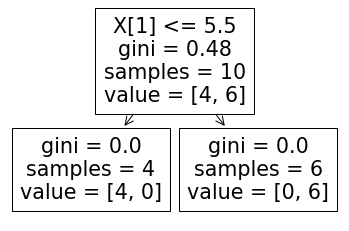

In [ ]:
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


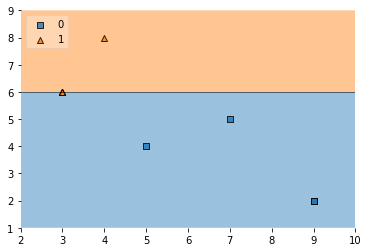

In [ ]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [ ]:
second_df['pred2'] = dt2.predict(X)

In [ ]:
second_df

,X1,X2,y,weight,pred2
0,3,6,1,0.1,1
1,5,4,0,0.1,0
2,4,8,1,0.1,1
3,9,2,0,0.1,0
4,3,6,1,0.1,1
5,7,5,0,0.1,0
6,3,6,1,0.1,1
7,3,6,1,0.1,1
8,9,2,0,0.1,0
9,3,6,1,0.1,1


In [ ]:
er = error_rate(second_df['y'], second_df['pred2'], second_df['weight'])
alpha2 = model_weight(er)

In [ ]:
er

0

In [ ]:
#Update the weights
new_weight = updated_weights(second_df['y'], second_df['pred2'], second_df['weight'])
second_df['updated_weight'] = new_weight

In [ ]:
second_df

,X1,X2,y,weight,pred2,updated_weight
0,3,6,1,0.1,1,0.1
1,5,4,0,0.1,0,0.1
2,4,8,1,0.1,1,0.1
3,9,2,0,0.1,0,0.1
4,3,6,1,0.1,1,0.1
5,7,5,0,0.1,0,0.1
6,3,6,1,0.1,1,0.1
7,3,6,1,0.1,1,0.1
8,9,2,0,0.1,0,0.1
9,3,6,1,0.1,1,0.1


In [ ]:
#Create range
second_df['upper_cumsum'] = np.cumsum(second_df['updated_weight'])
second_df['lower_cumsum'] = second_df['upper_cumsum'] - second_df['updated_weight']

In [ ]:
second_df[['X1', 'X2', 'y', 'weight', 'pred2', 'updated_weight', 'lower_cumsum', 'upper_cumsum']]

,X1,X2,y,weight,pred2,updated_weight,lower_cumsum,upper_cumsum
0,3,6,1,0.1,1,0.1,0.0,0.1
1,5,4,0,0.1,0,0.1,0.1,0.2
2,4,8,1,0.1,1,0.1,0.2,0.3
3,9,2,0,0.1,0,0.1,0.3,0.4
4,3,6,1,0.1,1,0.1,0.4,0.5
5,7,5,0,0.1,0,0.1,0.5,0.6
6,3,6,1,0.1,1,0.1,0.6,0.7
7,3,6,1,0.1,1,0.1,0.7,0.8
8,9,2,0,0.1,0,0.1,0.8,0.9
9,3,6,1,0.1,1,0.1,0.9,1.0


In [ ]:
new_indices = random_selection(second_df)

In [ ]:
third_df = df.iloc[new_indices, [0,1,2,3]]
new_indices

[3, 5, 0, 5, 3, 5, 7, 2, 2, 5]

In [ ]:
third_df.reset_index(inplace = True, drop = True)

In [ ]:
third_df

,X1,X2,y,weight
0,4,8,1,0.1
1,6,9,1,0.1
2,1,5,1,0.1
3,6,9,1,0.1
4,4,8,1,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,3,6,1,0.1
8,3,6,1,0.1
9,6,9,1,0.1


In [ ]:
#make 3rd decision tree
dt3 = DecisionTreeClassifier(max_depth=1)

In [ ]:
X = third_df.iloc[:, :2].values
y = third_df.iloc[:, 2].values

In [ ]:
dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 5.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

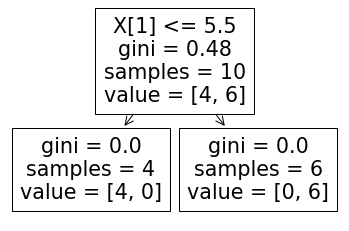

In [ ]:
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


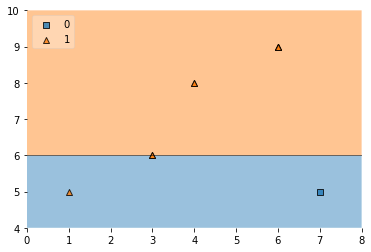

In [ ]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [ ]:
third_df['pred3'] = dt2.predict(X)

In [ ]:
third_df

,X1,X2,y,weight,pred3
0,4,8,1,0.1,1
1,6,9,1,0.1,1
2,1,5,1,0.1,0
3,6,9,1,0.1,1
4,4,8,1,0.1,1
5,6,9,1,0.1,1
6,7,5,0,0.1,0
7,3,6,1,0.1,1
8,3,6,1,0.1,1
9,6,9,1,0.1,1


In [ ]:
er = error_rate(third_df['y'], third_df['pred3'], third_df['weight'])
alpha3 = model_weight(er)

In [ ]:
alpha3

1.0986072886931095

In [ ]:
print(alpha1, alpha2, alpha3)

0.6931446805661953 6.907755278982137 1.0986072886931095


###Making Prediction

In [ ]:
query = np.array([9,2]).reshape(1,2)

In [ ]:
pred_dt1 = dt1.predict(query)
pred_dt2 = dt2.predict(query)
pred_dt3 = dt3.predict(query)
print('Prediction by DT1 is {} \nPrediction by DT2 is {} \nPrediction by DT2 is {}'.format(pred_dt1, pred_dt2, pred_dt3))

Prediction by DT1 is [0] 
Prediction by DT2 is [0] 
Prediction by DT2 is [0]


In [ ]:
#For 1, the sign is +1. For 0, the sign is -1
weigh_sum = alpha1*(-1)+alpha2*(-1)+alpha3*(-1)
final_pred = np.sign(weigh_sum)

In [ ]:
final_pred

-1.0

In [ ]:
weigh_sum

-8.699507248241442